In [286]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import scipy.stats as stats

In [287]:
super_dataset = pd.read_csv("/Users/cassidydevenouges/super_covid_dataset.csv")

In [288]:
super_dataset['cases per day'] = super_dataset['confirmed'].diff()
super_dataset['deaths per day'] = super_dataset['deaths'].diff()

In [289]:
# drop the messed up values from 2020-01-22
x = super_dataset[(super_dataset['date'] == '2020-01-22')].index
super_dataset.drop(x, inplace=True)
super_dataset.head()

,countyFIPS,County Name,State,date,confirmed,deaths,population,cases per day,deaths per day
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0.0,0.0
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0.0,0.0
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0.0,0.0
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0.0,0.0
5,0,statewide unallocated,AL,2020-01-27,0,0,0,0.0,0.0


In [290]:
super_dataset['date'] = super_dataset.date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
super_dataset = super_dataset[super_dataset.countyFIPS != 0]

In [291]:
# Simplify the data to the state and relevant column
# County name will not be included because we're just looking at the state trends overall

texas_dataset = super_dataset[super_dataset['State'] == 'TX']
texas_dataset = texas_dataset[['State', 'date', 'confirmed', 'deaths', 'population', 'cases per day', 'deaths per day']]
texas_dataset.head()

,State,date,confirmed,deaths,population,cases per day,deaths per day
1461151,TX,2020-01-23,0,0,57735,0.0,0.0
1461152,TX,2020-01-24,0,0,57735,0.0,0.0
1461153,TX,2020-01-25,0,0,57735,0.0,0.0
1461154,TX,2020-01-26,0,0,57735,0.0,0.0
1461155,TX,2020-01-27,0,0,57735,0.0,0.0


In [292]:
texas_dataset = texas_dataset.groupby([pd.Grouper(key='date', freq='w')])[['cases per day','deaths per day']].agg({'cases per day':'sum','deaths per day' :'sum'}).reset_index()
texas_dataset = texas_dataset.rename(columns={'cases per day': 'cases per week', 'deaths per day': 'deaths per week'})
texas_dataset.head()

,date,cases per week,deaths per week
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0


* Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state.

In [293]:
df_mean_cases = texas_dataset["cases per week"].mean()
df_median_cases = texas_dataset["cases per week"].median()
df_mode_cases = texas_dataset["cases per week"].mode()
print("Confirmed in Texas")
print("mean:", df_mean_cases)
print("median:", df_median_cases)
print("mode", df_mode_cases)

Confirmed in Texas
mean: 40118.1686746988
median: 26807.0
mode 0    0.0
dtype: float64


In [294]:
df_mean_deaths = texas_dataset["deaths per week"].mean()
df_median_deaths = texas_dataset["deaths per week"].median()
df_mode_deaths = texas_dataset["deaths per week"].mode()
print("Deaths in Texas:")
print("mean:", df_mean_deaths)
print("median:", df_median_deaths)
print("mode", df_mode_deaths)

Deaths in Texas:
mean: 639.5301204819277
median: 400.0
mode 0    0.0
dtype: float64


* Compare the data against other states. (normalize by population)

In [295]:
# normalize the super dataset
super_dataset['normalized cases']= (super_dataset['cases per day']/super_dataset['population'])*100000
super_dataset['normalized deaths']= (super_dataset['deaths per day']/super_dataset['population'])*100000
super_dataset.head()

,countyFIPS,County Name,State,date,confirmed,deaths,population,cases per day,deaths per day,normalized cases,normalized deaths
574,1001,autauga county,AL,2020-01-23,0,0,55869,0.0,0.0,0.0,0.0
575,1001,autauga county,AL,2020-01-24,0,0,55869,0.0,0.0,0.0,0.0
576,1001,autauga county,AL,2020-01-25,0,0,55869,0.0,0.0,0.0,0.0
577,1001,autauga county,AL,2020-01-26,0,0,55869,0.0,0.0,0.0,0.0
578,1001,autauga county,AL,2020-01-27,0,0,55869,0.0,0.0,0.0,0.0


In [296]:
# choose 5 other states to compare with 

# Normalized Texas
n_tx_dataset = super_dataset[super_dataset['State'] == 'TX']
n_tx_dataset = n_tx_dataset[['State', 'date', 'confirmed', 'deaths', 'population', 'normalized cases', 'normalized deaths']]

# North Carolina
nc_dataset = super_dataset[super_dataset['State'] == 'NC']
nc_dataset = nc_dataset[['State', 'date', 'confirmed', 'deaths', 'population', 'normalized cases', 'normalized deaths']]

# California
ca_dataset = super_dataset[super_dataset['State'] == 'CA']
ca_dataset = ca_dataset[['State', 'date', 'confirmed', 'deaths', 'population', 'normalized cases', 'normalized deaths']]

# Florida
fl_dataset = super_dataset[super_dataset['State'] == 'FL']
fl_dataset = fl_dataset[['State', 'date', 'confirmed', 'deaths', 'population', 'normalized cases', 'normalized deaths']]

# New York
ny_dataset = super_dataset[super_dataset['State'] == 'NY']
ny_dataset = ny_dataset[['State', 'date', 'confirmed', 'deaths', 'population', 'normalized cases', 'normalized deaths']]

# Pennsylvania
pa_dataset = super_dataset[super_dataset['State'] == 'PA']
pa_dataset = pa_dataset[['State', 'date', 'confirmed', 'deaths', 'population', 'normalized cases', 'normalized deaths']]


In [297]:
# group each of the 5 states by week

# Normalized Texas
n_tx_dataset = n_tx_dataset.groupby([pd.Grouper(key='date', freq='w')])[['normalized cases','normalized deaths']].agg({'normalized cases':'sum','normalized deaths' :'sum'}).reset_index()
n_tx_dataset = n_tx_dataset.rename(columns={'normalized cases': 'cases per week', 'normalized deaths': 'deaths per week'})

# North Carolina
nc_dataset = nc_dataset.groupby([pd.Grouper(key='date', freq='w')])[['normalized cases','normalized deaths']].agg({'normalized cases':'sum','normalized deaths' :'sum'}).reset_index()
nc_dataset = nc_dataset.rename(columns={'normalized cases': 'cases per week', 'normalized deaths': 'deaths per week'})

# California
ca_dataset = ca_dataset.groupby([pd.Grouper(key='date', freq='w')])[['normalized cases','normalized deaths']].agg({'normalized cases':'sum','normalized deaths' :'sum'}).reset_index()
ca_dataset = ca_dataset.rename(columns={'normalized cases': 'cases per week', 'normalized deaths': 'deaths per week'})

# Florida
fl_dataset = fl_dataset.groupby([pd.Grouper(key='date', freq='w')])[['normalized cases','normalized deaths']].agg({'normalized cases':'sum','normalized deaths' :'sum'}).reset_index()
fl_dataset = fl_dataset.rename(columns={'normalized cases': 'cases per week', 'normalized deaths': 'deaths per week'})

# New York
ny_dataset = ny_dataset.groupby([pd.Grouper(key='date', freq='w')])[['normalized cases','normalized deaths']].agg({'normalized cases':'sum','normalized deaths' :'sum'}).reset_index()
ny_dataset = ny_dataset.rename(columns={'normalized cases': 'cases per week', 'normalized deaths': 'deaths per week'})

# Pennsylvania
pa_dataset = pa_dataset.groupby([pd.Grouper(key='date', freq='w')])[['normalized cases','normalized deaths']].agg({'normalized cases':'sum','normalized deaths' :'sum'}).reset_index()
pa_dataset = pa_dataset.rename(columns={'normalized cases': 'cases per week', 'normalized deaths': 'deaths per week'})


In [298]:
nc_mean_cases = nc_dataset["cases per week"].mean()
nc_median_cases = nc_dataset["cases per week"].median()
nc_mode_cases = nc_dataset["cases per week"].mode()
print("Confirmed in North Carolina")
print("mean:", nc_mean_cases)
print("median:", nc_median_cases)
print("mode:", nc_mode_cases)
print()
nc_mean_deaths = nc_dataset["deaths per week"].mean()
nc_median_deaths = nc_dataset["deaths per week"].median()
nc_mode_deaths = nc_dataset["deaths per week"].mode()
print("Deaths in North Carolina:")
print("mean:", nc_mean_deaths)
print("median:", nc_median_deaths)
print("mode:", nc_mode_deaths)

Confirmed in North Carolina
mean: 12946.19745753378
median: 9798.089882371994
mode: 0    0.0
dtype: float64

Deaths in North Carolina:
mean: 196.49888739075416
median: 128.99305027374174
mode: 0    0.0
dtype: float64


In [299]:
ca_mean_cases = ca_dataset["cases per week"].mean()
ca_median_cases = ca_dataset["cases per week"].median()
ca_mode_cases = ca_dataset.mode()['cases per week'][0]
print("Confirmed in California")
print("mean:", ca_mean_cases)
print("median:", ca_median_cases)
print("mode:", ca_mode_cases)
print()
ca_mean_deaths = ca_dataset["deaths per week"].mean()
ca_median_deaths = ca_dataset["deaths per week"].median()
ca_mode_deaths = ca_dataset["deaths per week"].mode()
print("Deaths in California:")
print("mean:", ca_mean_deaths)
print("median:", ca_median_deaths)
print("mode:", ca_mode_deaths)


Confirmed in California
mean: 5939.060634512574
median: 2757.9687074428452
mode: 0.04145024517422976

Deaths in California:
mean: 73.64348813867585
median: 44.86211295336464
mode: 0    0.0
dtype: float64


In [300]:
fl_mean_cases = fl_dataset["cases per week"].mean()
fl_median_cases = fl_dataset["cases per week"].median()
fl_mode_cases = fl_dataset["cases per week"].mode()
print("Confirmed in Florida")
print("mean:", fl_mean_cases)
print("median:", fl_median_cases)
print("mode:", fl_mode_cases)
print()
fl_mean_deaths = fl_dataset["deaths per week"].mean()
fl_median_deaths = fl_dataset["deaths per week"].median()
fl_mode_deaths = fl_dataset["deaths per week"].mode()
print("Deaths in Florida:")
print("mean:", fl_mean_deaths)
print("median:", fl_median_deaths)
print("mode:", fl_mode_deaths)

Confirmed in Florida
mean: 10399.20663814489
median: 7300.350245133687
mode: 0    0.0
dtype: float64

Deaths in Florida:
mean: 159.3925882088628
median: 111.90862133451061
mode: 0    0.0
dtype: float64


In [301]:
ny_mean_cases = ny_dataset["cases per week"].mean()
ny_median_cases = ny_dataset["cases per week"].median()
ny_mode_cases = ny_dataset["cases per week"].mode()
print("Confirmed in New York")
print("mean:", ny_mean_cases)
print("median:", ny_median_cases)
print("mode:", ny_mode_cases)
print()
ny_mean_deaths = ny_dataset["deaths per week"].mean()
ny_median_deaths = ny_dataset["deaths per week"].median()
ny_mode_deaths = ny_dataset["deaths per week"].mode()
print("Deaths in New York:")
print("mean:", ny_mean_deaths)
print("median:", ny_median_deaths)
print("mode:", ny_mode_deaths)

Confirmed in New York
mean: 6467.085411212127
median: 3175.100089037888
mode: 0    0.0
dtype: float64

Deaths in New York:
mean: 117.00698739527431
median: 45.77280635911807
mode: 0    0.0
dtype: float64


In [302]:
pa_mean_cases = pa_dataset["cases per week"].mean()
pa_median_cases = pa_dataset["cases per week"].median()
pa_mode_cases = pa_dataset["cases per week"].mode()
print("Confirmed in Pennsylvania")
print("mean:", pa_mean_cases)
print("median:", pa_median_cases)
print("mode:", pa_mode_cases)
print()
pa_mean_deaths = pa_dataset["deaths per week"].mean()
pa_median_deaths = pa_dataset["deaths per week"].median()
pa_mode_deaths = pa_dataset["deaths per week"].mode()
print("Deaths in Pennsylvania:")
print("mean:", pa_mean_deaths)
print("median:", pa_median_deaths)
print("mode:", pa_mode_deaths)

Confirmed in Pennsylvania
mean: 7917.529425872122
median: 2722.097410606196
mode: 0    0.0
dtype: float64

Deaths in Pennsylvania:
mean: 184.41533083944657
median: 84.41152869734121
mode: 0    0.0
dtype: float64


In [303]:
n_tx_mean_cases = n_tx_dataset["cases per week"].mean()
n_tx_median_cases = n_tx_dataset["cases per week"].median()
n_tx_mode_cases = n_tx_dataset["cases per week"].mode()
print("Confirmed in Texas")
print("mean:", n_tx_mean_cases)
print("median:", n_tx_median_cases)
print("mode:", n_tx_mode_cases)
print()
n_tx_mean_deaths = n_tx_dataset["deaths per week"].mean()
n_tx_median_deaths = n_tx_dataset["deaths per week"].median()
n_tx_mode_deaths = n_tx_dataset["deaths per week"].mode()
print("Deaths in Texas:")
print("mean:", n_tx_mean_deaths)
print("median:", n_tx_median_deaths)
print("mode:", n_tx_mode_deaths)

Confirmed in Texas
mean: 35863.92134782459
median: 21992.22401418823
mode: 0    0.0
dtype: float64

Deaths in Texas:
mean: 863.0105280239087
median: 446.68439353408485
mode: 0    0.0
dtype: float64


In [304]:
# compare cases per week by states
table = [['state','mean', 'median', 'mode'],['TX',35863,21992,0],['NC', 12946,9798,0], ['CA',5939,2757,0],['FL', 10399,7300,0],['NY',6467,3175,0],['PA',7917,2722,0]]
print("Cases")
print(tabulate(table))

Cases
-----  -----  ------  ----
state  mean   median  mode
TX     35863  21992   0
NC     12946  9798    0
CA     5939   2757    0
FL     10399  7300    0
NY     6467   3175    0
PA     7917   2722    0
-----  -----  ------  ----


In [305]:
# compare cases per week by states
table = [['state','mean', 'median', 'mode'],['TX',863,446,0],['NC', 196,128,0], ['CA',73,44,0],['FL', 159,111,0],['NY',117,45,0],['PA',184,84,0]]
print("Deaths")
print(tabulate(table))

Deaths
-----  ----  ------  ----
state  mean  median  mode
TX     863   446     0
NC     196   128     0
CA     73    44      0
FL     159   111     0
NY     117   45      0
PA     184   84      0
-----  ----  ------  ----


* Identify counties within the previous state with high case and death rates. (normalize by population)

In [306]:
texas_dataset_2 = super_dataset[super_dataset['State'] == 'TX']
texas_dataset_2 = texas_dataset_2[['State', 'County Name','date', 'confirmed', 'deaths', 'population', 'normalized cases', 'normalized deaths']]
texas_dataset_2.head()

,State,County Name,date,confirmed,deaths,population,normalized cases,normalized deaths
1461151,TX,anderson county,2020-01-23,0,0,57735,0.0,0.0
1461152,TX,anderson county,2020-01-24,0,0,57735,0.0,0.0
1461153,TX,anderson county,2020-01-25,0,0,57735,0.0,0.0
1461154,TX,anderson county,2020-01-26,0,0,57735,0.0,0.0
1461155,TX,anderson county,2020-01-27,0,0,57735,0.0,0.0


In [307]:
# counties by mean cases & deaths
texas_dataset_2 = texas_dataset_2.groupby(['County Name'])[['normalized cases','normalized deaths']].agg({'normalized cases':'mean','normalized deaths' :'mean'}).round(decimals=0)

In [308]:
# sort by highest numbers in county
texas_dataset_2.sort_values(["normalized cases", "normalized deaths"], ascending = (False, False)).reset_index()

,County Name,normalized cases,normalized deaths
0,dimmit county,56.0,1.0
1,concho county,38.0,1.0
2,lamb county,36.0,1.0
3,hale county,34.0,1.0
4,maverick county,34.0,1.0
...,...,...,...
249,borden county,9.0,1.0
250,throckmorton county,9.0,1.0
251,newton county,9.0,0.0
252,king county,7.0,0.0


* Plot daily trends (new cases and deaths) of state and top 5 infected counties. Utilize aggregrate, normalized by population, and log normalized values.

In [309]:
texas_dataset_3 = super_dataset[super_dataset['State'] == 'TX']
texas_dataset_3 = texas_dataset_3[['State', 'County Name','date', 'normalized cases', 'normalized deaths']]
texas_dataset_3 = texas_dataset_3.loc[(texas_dataset_3['County Name'] == 'dimmit county') | 
                                      (texas_dataset_3['County Name'] == 'concho county')| 
                                      (texas_dataset_3['County Name'] == 'lamb county') |
                                      (texas_dataset_3['County Name'] == 'hale county') | 
                                      (texas_dataset_3['County Name'] == 'maverick county')]
texas_dataset_3.head()

,State,County Name,date,normalized cases,normalized deaths
1488082,TX,concho county,2020-01-23,0.0,0.0
1488083,TX,concho county,2020-01-24,0.0,0.0
1488084,TX,concho county,2020-01-25,0.0,0.0
1488085,TX,concho county,2020-01-26,0.0,0.0
1488086,TX,concho county,2020-01-27,0.0,0.0


### Task 2: part 1
* Fit a distribution to the number of COVID-19 new cases of a state of your choosing.
    * Graphically plot the distribution and describe the distribution statistics. If using discrete values, calculate the Probability Mass Function for the individual values or range (if using histogram) and plot that.
    * Describe the type of distribution (modality) and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the report and the notebook.
    * Compare the distribution and its statistics to 5 other states of your choosing.

In [310]:
n_tx_dataset.head()

,date,cases per week,deaths per week
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0


In [311]:
n_tx_dataset.cases_per_week.hist(bins=10, ec='black', figsize=(8,5))

AttributeError: 'DataFrame' object has no attribute 'cases_per_week'

In [ ]:
nc_c_var  = nc_dataset["cases per week"].var()
nc_c_var

In [ ]:
ca_c_var  = ca_dataset["cases per week"].var()
ca_c_var

In [ ]:
fl_c_var  = fl_dataset["cases per week"].var()
fl_c_var

In [ ]:
ny_c_var  = ny_dataset["cases per week"].var()
ny_c_var

In [ ]:
pa_c_var  = pa_dataset["cases per week"].var()
pa_c_var

In [ ]:
texas_c_var  = n_tx_dataset["cases per week"].var()
texas_c_var

In [ ]:
texas_c_skew = n_tx_dataset["cases per week"].skew()
texas_c_skew 

In [ ]:
nc_skew = nc_dataset["cases per week"].skew()
nc_skew 

In [ ]:
ca_skew = ca_dataset["cases per week"].skew()
ca_skew 

In [ ]:
fl_skew = fl_dataset["cases per week"].skew()
fl_skew 

In [ ]:
ny_skew = ny_dataset["cases per week"].skew()
ny_skew 

In [ ]:
pa_skew = nc_dataset["cases per week"].skew()
pa_skew 

In [ ]:
texas_c_kurtosis = n_tx_dataset["cases per week"].kurtosis()
texas_c_kurtosis 

In [ ]:
nc_kurtosis = nc_dataset["cases per week"].kurtosis()
nc_kurtosis 

In [ ]:
ca_kurtosis = ca_dataset["cases per week"].kurtosis()
ca_kurtosis

In [312]:
fl_kurtosis = fl_dataset["cases per week"].kurtosis()
fl_kurtosis

1.9927668553131825

In [313]:
ny_kurtosis = ny_dataset["cases per week"].kurtosis()
ny_kurtosis

2.9562703743664125

In [314]:
pa_kurtosis = pa_dataset["cases per week"].kurtosis()
pa_kurtosis

2.2583745666463892

#### Texas: 
* **Type of distribution:** Exponential
* **Moments of a distribution - center:** 35863
* **Variance:** 2027273428.142
* **Skewness:** 2.307
* **Kurtosis:** 7.537

#### North Carolina: 
* **Type of distribution:** Exponential
* **Moments of a distribution - center:** 12946
* **Variance:** 197364443.562
* **Skewness:** 2.122
* **Kurtosis:** 5.348

#### California: 
* **Type of distribution:** Exponential
* **Moments of a distribution - center:** 5939
* **Variance:** 62872809.861
* **Skewness:** 2.301
* **Kurtosis:** 5.311

#### Florida: 
* **Type of distribution:** Exponential
* **Moments of a distribution - center:** 10399
* **Variance:** 121638897.076
* **Skewness:** 1.428
* **Kurtosis:** 1.993

#### New York: 
* **Type of distribution:** Exponential
* **Moments of a distribution - center:** 6467
* **Variance:** 63809830.34315926
* **Skewness:** 1.807
* **Kurtosis:** 2.956

#### Pennsylvania: 
* **Type of distribution:** Exponential
* **Moments of a distribution - center:** 7917
* **Variance:** 109087168.913
* **Skewness:** 2.122
* **Kurtosis:** 2.258

In [318]:
n_tx_dataset.head()

,date,cases per week,deaths per week
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0


### Task 2: part 2
* Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states. For example, number of new cases and deaths per 100,000 population. Hint - the parameter for a poission's distribution will be its mean value. Then for the minimum and maximum range of covid cases you are calculating probability mass function to observe the probability at different points.

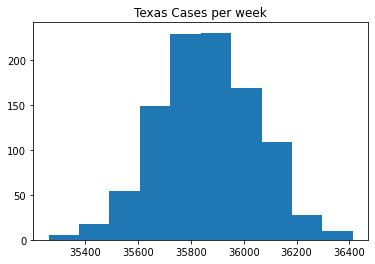

In [323]:
texas = stats.poisson.rvs(size = 1000, mu = 35863)
plt.hist(texas)
plt.title("Texas Cases per week") 
plt.show()

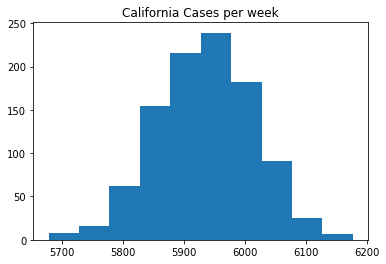

In [325]:
ca = stats.poisson.rvs(size = 1000, mu = 5939)
plt.hist(ca)
plt.title("California Cases per week") 
plt.show()

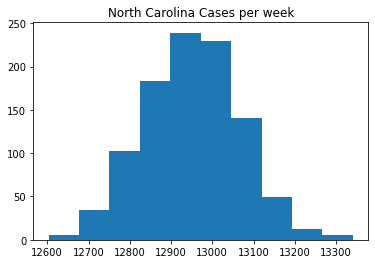

In [326]:
nc = stats.poisson.rvs(size = 1000, mu = 12946)
plt.hist(nc)
plt.title("North Carolina Cases per week") 
plt.show()

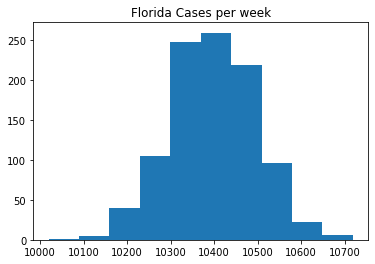

In [327]:
fl = stats.poisson.rvs(size = 1000, mu = 10399)
plt.hist(fl)
plt.title("Florida Cases per week") 
plt.show()

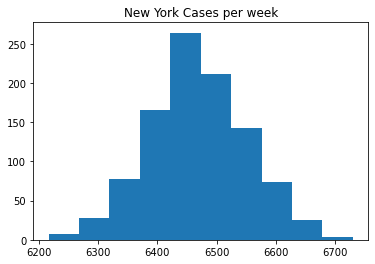

In [328]:
ny = stats.poisson.rvs(size = 1000, mu = 6467)
plt.hist(ny)
plt.title("New York Cases per week") 
plt.show()

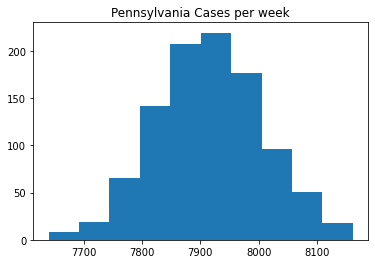

In [329]:
pa = stats.poisson.rvs(size = 1000, mu = 7917)
plt.hist(pa)
plt.title("Pennsylvania Cases per week") 
plt.show()

### Task 2: part 3
* Model poission distributions for North Carolina counties COVID-19 in cases and deaths. For example, number of new cases and deaths per 100,000 populations.

### Task 2: part 4
* Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.

    * You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based covid data to enrichment data for correlation. Between states you would need to aggregate to state level data and then perform correlation. Both covid and enrichment data will need to be normalized for population. For number of covid cases you can use a measure of center value (median or mean) to compare the number of cases.

### Task 2: part 5
* Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against.
    * For example: Does higher employment data lead to higher covid case numbers or more rapid increase in covid cases.